<a href="https://colab.research.google.com/github/syc113/syc113/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import packages

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Loading the Dataset

In [2]:
breast_cancer = load_breast_cancer()

# Checking Sizes

In [3]:
print(breast_cancer.data.shape)

print(breast_cancer.target.shape)

print(breast_cancer.target_names)

print(breast_cancer.feature_names)

(569, 30)
(569,)
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#Splitting the Data for Training and Testing

In [4]:
X_train,X_test, y_train,y_test=train_test_split(breast_cancer.data,breast_cancer.target,random_state=0)

#Training and Testing Set Sizes

In [5]:
print(X_train.shape)

(426, 30)


In [6]:
print(X_test.shape)

(143, 30)


# Model

In [7]:
naive_bayes=GaussianNB()

# Training the Model

In [8]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

# Predicting

In [9]:
predicted=naive_bayes.predict(X_test)
expected=y_test

In [10]:
predicted[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [11]:
expected[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [12]:
wrong=[(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(wrong)

[(0, 1), (0, 1), (0, 1), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]


# Estimator Method score

In [13]:
print(f'{naive_bayes.score(X_test, y_test):.2%}')

93.71%


# Confusion Matrix

In [14]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

[[48  5]
 [ 4 86]]


# Classification Report

In [15]:
names = breast_cancer.target_names
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Visualizing the Confusion Matrix

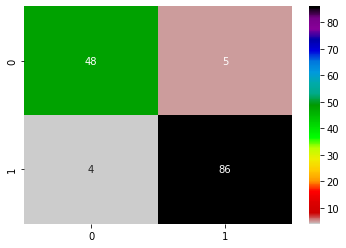

In [16]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

# K-Fold Cross-Validation

In [17]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=naive_bayes, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print(scores)

[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]


In [18]:
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 93.85%
Accuracy standard deviation: 2.75%


# Find the best one

In [19]:
estimators={
    'GaussianNB': naive_bayes,
    'KNeighborsClassifier': KNeighborsClassifier(), 
    'LogisticRegression': LogisticRegression(solver='lbfgs',multi_class='ovr',max_iter=10000),
    'SVC': SVC(gamma='scale')
}
for estimator_name,estimator_object in estimators.items():
    kfold=KFold(n_splits=10,random_state=11,shuffle=True)
    scores=cross_val_score(estimator=estimator_object,X=breast_cancer.data,y=breast_cancer.target,cv=kfold)
    print(f'{estimator_name:>20}:'+f'mean accuracy={scores.mean():.2%}; '+f'standard deviation={scores.std():.2%}')

          GaussianNB:mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier:mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression:mean accuracy=95.08%; standard deviation=3.02%
                 SVC:mean accuracy=91.92%; standard deviation=3.52%
